In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
## import hierarchial clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [6]:
Airline = pd.read_csv("C://data science//data sets//EastWestAirlines.csv")

In [7]:
Airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [9]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Airline.iloc[:,1:])

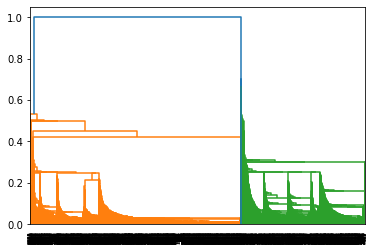

In [10]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [11]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [12]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [13]:
Clusters.head()

,Clusters
0,1
1,1
2,1
3,1
4,0


In [14]:
df_norm['h_clusterid'] = Clusters

In [15]:
Airline['cluster_lables'] = Clusters

In [16]:
Airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_lables
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [17]:
Airline.iloc[:,1:7].groupby(Airline.cluster_lables).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles
cluster_lables,,,,,,
0,97070.248817,240.183232,2.663962,1.015551,1.018256,28760.204868
1,59807.839555,87.602462,1.705322,1.013900,1.008737,10227.689039
2,160114.000000,500.000000,1.000000,1.000000,1.000000,71954.000000
3,8557.000000,0.000000,1.000000,1.000000,1.000000,200622.000000


In [18]:
import matplotlib.pylab as plt
from	sklearn.cluster	import	KMeans
from scipy.spatial.distance import cdist 

<AxesSubplot:xlabel='X', ylabel='Y'>

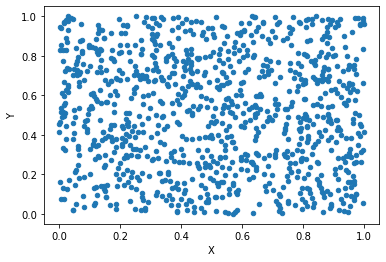

In [19]:
# Generating random uniform numbers 
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy.X = X
df_xy.Y = Y
df_xy.plot(x="X",y = "Y",kind="scatter")

<AxesSubplot:xlabel='X', ylabel='Y'>

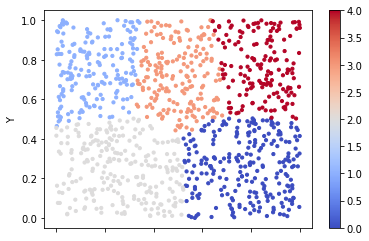

In [20]:
model1 = KMeans(n_clusters=5).fit(df_xy)

df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)

In [21]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())	/	(i.max()	-	i.min())
    return (x)

In [22]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Airline.iloc[:,1:])

df_norm.head(10)  # Top 10 rows

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_lables
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0.333333
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0.333333
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0.333333
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0.333333
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0.000000
5,0.009631,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.836749,0.0,0.333333
6,0.049808,0.0,0.50,0.0,0.0,0.104223,0.290698,0.000000,0.000000,0.843019,0.0,0.333333
7,0.012233,0.0,0.00,0.0,0.0,0.019910,0.046512,0.008112,0.018868,0.836267,1.0,0.000000
8,0.259850,0.0,0.50,0.5,0.0,0.006648,0.500000,0.124931,0.226415,0.837473,1.0,0.000000
9,0.061507,0.0,0.50,0.0,0.0,0.107803,0.325581,0.037317,0.056604,0.835423,1.0,0.000000


In [23]:
###### screw plot or elbow curve ############
k = list(range(2,23))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x185fc000e50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

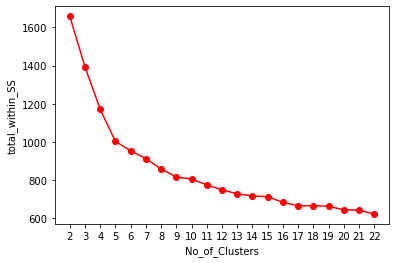

In [24]:
# Scree plot 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [25]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=5) 
model.fit(df_norm)

KMeans(n_clusters=5)

In [26]:
model.labels_ # getting the labels of clusters assigned to each row 
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
Airline['clust']=md # creating a  new column and assigning it to new column 
df_norm.head()
Airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_lables,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,4


In [27]:
Airline.iloc[:,1:7].groupby(Airline.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles
clust,,,,,,
0,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204
1,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245
2,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885
3,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349
4,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178


In [28]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [29]:
array = Airline.values

In [30]:
array

array([[    1, 28143,     0, ...,     0,     1,     2],
       [    2, 19244,     0, ...,     0,     1,     2],
       [    3, 41354,     0, ...,     0,     1,     2],
       ...,
       [ 4019, 73597,     0, ...,     1,     0,     4],
       [ 4020, 54899,     0, ...,     0,     1,     3],
       [ 4021,  3016,     0, ...,     0,     1,     3]], dtype=int64)

In [31]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [32]:
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  7.61600174e-01, -1.37034145e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  7.61600174e-01, -1.37034145e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  7.61600174e-01, -1.37034145e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
         1.30391816e+00, -1.30184095e+00,  1.34604987e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  7.61600174e-01,  6.04507865e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  7.61600174e-01,  6.04507865e-01]])

In [33]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [34]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [35]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [36]:
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,2
3997,0


In [38]:
pd.concat([Airline,cl],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_lables,clust,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,2,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,2,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,2,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,2,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,4,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,4,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,3,0
